Inaccessibility Score:

This notebook performs analysis on the sidewalks_score_main.

The results of this analysis are:

1) To identify the top 5 sidewalks with the highest inaccessiblity score.
2) To identify the top 5 sidewalks with the highest hazard score.
3) To identify the top 5 sidewalks with the highest poor ramp score.
4) To identify the top 5% of the worst sidewalks 


In [1]:
import pandas as pd
import geopandas as gpd

In [5]:


replace_dict = { 'WEST ROXBURY AND ROSLINDALE' : 'Roslindale' ,
                
                'JAMAICA PLAIN' : 'Jamaica Plain',

                'ROXBURY 10B' : 'Roxbury',

                'ROXBURY 10A' : 'Roxbury',

                'ROXBURY' : 'Roxbury',

                'CHARLESTOWN' : 'Charlestown',

                'SOUTH DORCHESTER' : 'Dorchester' ,

                'NORTH END' : 'North End',

                'DOWNTOWN' : 'Downtown',

                'HYDE PARK' : 'Hyde Park',


                'SOUTH BOSTON' : 'South Boston',

                'THE NORTH END' : 'North End',

                'WEST ROXBURY' : 'West Roxbury',

                'ALLSTON/BRIGHTON' : 'Allston',

                'EAST BOSTON' : 'East Boston',

                'NORTH DORCHESTER' : 'Dorchester',


                }

In [6]:
access_score= pd.read_csv('../data/sidewalks_score_main.csv')

access_score =access_score.rename(columns = {'DISTRICT_x' : 'DISTRICT'})
access_score.columns

Index(['Unnamed: 0', 'ID', 'ramp_score', 'hazard_score', 'geometry',
       'DISTRICT', 'score', 'Fixed pinch point <36” sidewalk width',
       'Trip hazards due to tree roots', 'Trip hazards not due to tree roots'],
      dtype='object')

In [7]:
access_score = access_score.replace({'DISTRICT': replace_dict})

In [8]:
region = gpd.read_file('../data/Boston_Neighborhoods.geojson')
region = region.rename(columns = {'Name' : 'DISTRICT'})
region = region[['DISTRICT', 'geometry']]

In [9]:
access_score

,Unnamed: 0,ID,ramp_score,hazard_score,geometry,DISTRICT,score,Fixed pinch point <36” sidewalk width,Trip hazards due to tree roots,Trip hazards not due to tree roots
0,0,0,1.0,11.0,"POLYGON ((772436.3028260022 2964399.527495086,...",Charlestown,12.0,3.0,3.0,5.0
1,1,1,1.0,0.0,POLYGON ((764945.1412991732 2926518.8706450015...,Dorchester,1.0,0.0,0.0,0.0
2,2,2,1.0,0.0,POLYGON ((764853.4101834297 2926759.2805972546...,Dorchester,1.0,0.0,0.0,0.0
3,3,3,2.0,0.0,POLYGON ((764907.1584355086 2926824.2013991773...,Dorchester,2.0,0.0,0.0,0.0
4,4,4,1.0,1.0,POLYGON ((764831.0978920907 2927057.0096605867...,Dorchester,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
23342,23342,23515,0.0,0.0,POLYGON ((763550.6873212492 2924072.9182754606...,Hyde Park,0.0,0.0,0.0,0.0
23343,23343,23516,0.0,2.0,MULTIPOLYGON (((750522.6517715073 2929924.9304...,West Roxbury,2.0,0.0,1.0,1.0
23344,23344,23517,0.0,0.0,"POLYGON ((747005.7523092638 2926356.796822175,...",West Roxbury,0.0,0.0,0.0,0.0
23345,23345,23518,0.0,0.0,POLYGON ((776379.1387651783 2959259.1424842635...,North End,0.0,0.0,0.0,0.0


In [10]:
# pd.merge(region, access_score, on = 'DISTRICT')

In [13]:
access_score.groupby('DISTRICT')['score']

In [14]:
top_5_percent = int(5*len(access_score)/100)
top_5_percent

top_5_percent_inaccessible_score = access_score[['ID','DISTRICT','ramp_score','hazard_score','score', 'geometry']].nlargest(top_5_percent,'score')
top_5_percent_inaccessible_score = top_5_percent_inaccessible_score.groupby('DISTRICT')['ID'].count()
top_5_percent_inaccessible_score=top_5_percent_inaccessible_score.sort_values(ascending=False)
district_count = top_5_percent_inaccessible_score.reset_index()

In [15]:
merged = pd.merge(district_count, region, on = 'DISTRICT')

In [16]:
merged['val'] = merged['ID']/merged['ID'].mean()
merged

,DISTRICT,ID,geometry,val
0,Dorchester,169,"MULTIPOLYGON (((-71.05896 42.32876, -71.05914 ...",1.737789
1,Roxbury,148,"POLYGON ((-71.09646 42.29323, -71.09633 42.293...",1.521851
2,Downtown,145,"POLYGON ((-71.05342 42.36130, -71.05391 42.361...",1.491003
3,West Roxbury,141,"POLYGON ((-71.16470 42.30384, -71.17861 42.294...",1.449871
4,East Boston,89,"POLYGON ((-70.99546 42.39394, -70.99557 42.394...",0.915167
5,North End,89,"POLYGON ((-71.05200 42.36884, -71.05219 42.368...",0.915167
6,South Boston,86,"POLYGON ((-71.06104 42.34283, -71.06102 42.342...",0.884319
7,Allston,77,"POLYGON ((-71.13517 42.34601, -71.13338 42.347...",0.791774
8,Charlestown,77,"MULTIPOLYGON (((-71.07416 42.39051, -71.07417 ...",0.791774
9,Jamaica Plain,73,"POLYGON ((-71.10499 42.32610, -71.10503 42.326...",0.750643


In [20]:
merged

,Unnamed: 0,ID,ramp_score,hazard_score,geometry,DISTRICT,score,Fixed pinch point <36” sidewalk width,Trip hazards due to tree roots,Trip hazards not due to tree roots
0,0,0,1.0,11.0,"POLYGON ((-71.06966 42.38166, -71.06961 42.381...",Charlestown,12.0,3.0,3.0,5.0
1,1,1,1.0,0.0,"POLYGON ((-71.09805 42.27781, -71.09805 42.277...",Dorchester,1.0,0.0,0.0,0.0
2,2,2,1.0,0.0,"POLYGON ((-71.09838 42.27847, -71.09838 42.278...",Dorchester,1.0,0.0,0.0,0.0
3,3,3,2.0,0.0,"POLYGON ((-71.09818 42.27865, -71.09819 42.278...",Dorchester,2.0,0.0,0.0,0.0
4,4,4,1.0,1.0,"POLYGON ((-71.09846 42.27929, -71.09846 42.279...",Dorchester,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
23342,23342,23515,0.0,0.0,"POLYGON ((-71.10324 42.27112, -71.10321 42.271...",Hyde Park,0.0,0.0,0.0,0.0
23343,23343,23516,0.0,2.0,"MULTIPOLYGON (((-71.15129 42.28733, -71.15119 ...",West Roxbury,2.0,0.0,1.0,1.0
23344,23344,23517,0.0,0.0,"POLYGON ((-71.16434 42.27758, -71.16434 42.277...",West Roxbury,0.0,0.0,0.0,0.0
23345,23345,23518,0.0,0.0,"POLYGON ((-71.05516 42.36750, -71.05520 42.367...",North End,0.0,0.0,0.0,0.0


In [25]:
import folium
import pandas as pd
import shapely
# Load data
# cnt = gpd.GeoDataFrame(sidewalks_score).set_crs('3586').to_crs(epsg=4326)
from shapely.wkt import loads

############# NOTE:
# if the code throws 'Series' does not have to crs

# Convert the dataset using,
# from shapely.wkt import loads
# Dataset = dataset.apply(loads)

# If there is no CRS set,
# set it by 
# Dataset = dataset.set_crs('3586' or '2249')

# access_score['geometry'] =  access_score['geometry'].apply(loads)
merged = gpd.GeoDataFrame(access_score).set_crs(2249).to_crs(epsg=4326)

map = folium.Map(location=[42.2995, -71.0649], zoom_start=15)


def color_cluster_sidewalks(cnt_):
    # print(cnt_)
    # print(cnt_['properties'])
    cnt1 = cnt_['properties']['cnt']
    if cnt1 >  1.5:
        return  {'fillColor': '#f10b21',  'color': '#f10b21', 'fillOpacity' : '0.5'}
    elif cnt1 > 1:
        return  {'fillColor': '#f76900', 'color': '#f76900', 'fillOpacity' : '0.5'}
    elif cnt1 > 0.76:
        return  {'fillColor': '#f4a000', 'color': '#f4a000' ,'fillOpacity' : '0.5'}
    elif cnt1 > 0.9:
        return {'fillColor': '#eccf33', 'color': '#eccf33', 'fillOpacity' : '0.5'}
    else:
        return {'fillColor': '#e1fa6e', 'color': '#e1fa6e', 'fillOpacity' : '0.5'}



def convert(row):
    t = shapely.geometry.mapping(row['geometry'])
    return {
       "type": "Feature",
  "geometry": {
    "type": row['geometry'].geom_type,
    "coordinates": t['coordinates']
  },
  "properties": {
    "cnt": row['score']
  }
    }
for index,row in merged.iterrows():

    if row['geometry']== None:
        continue
    b = folium.GeoJson(convert(row), style_function = color_cluster_sidewalks)
    b.add_child(folium.Popup(                  
                          "<br><br>Count of bad sidewalks   : " + str(row['ID'])
                         ,
                         max_width=400))
    b.add_to(map)




In [27]:

map.save("../maps/sidewalks/top_5_region.html")

In [28]:
acc = pd.merge(merged, access_score[['ID','DISTRICT','ramp_score','hazard_score','score', 'geometry']].nlargest(top_5_percent,'score'), on = 'DISTRICT')

In [29]:
acc = acc.drop('geometry_x', axis = 1)
acc = acc.rename(columns = {'geometry_y':'geometry'})

In [30]:
acc

,Unnamed: 0,ID_x,ramp_score_x,hazard_score_x,DISTRICT,score_x,Fixed pinch point <36” sidewalk width,Trip hazards due to tree roots,Trip hazards not due to tree roots,ID_y,ramp_score_y,hazard_score_y,score_y,geometry
0,0,0,1.0,11.0,Charlestown,12.0,3.0,3.0,5.0,4617,1.0,19.0,20.0,"POLYGON ((772316.743 2964646.483, 772308.396 2..."
1,0,0,1.0,11.0,Charlestown,12.0,3.0,3.0,5.0,9189,7.0,7.0,14.0,"POLYGON ((772834.847 2962924.228, 772837.855 2..."
2,0,0,1.0,11.0,Charlestown,12.0,3.0,3.0,5.0,0,1.0,11.0,12.0,"POLYGON ((772436.303 2964399.527, 772449.080 2..."
3,0,0,1.0,11.0,Charlestown,12.0,3.0,3.0,5.0,14499,3.0,9.0,12.0,"POLYGON ((775396.338 2962284.357, 775402.524 2..."
4,0,0,1.0,11.0,Charlestown,12.0,3.0,3.0,5.0,89,2.0,8.0,10.0,"MULTIPOLYGON (((772179.686 2964191.217, 772178..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822835,23290,23433,0.0,0.0,Roslindale,0.0,0.0,0.0,0.0,21520,1.0,4.0,5.0,"MULTIPOLYGON (((749364.842 2929746.438, 749363..."
2822836,23290,23433,0.0,0.0,Roslindale,0.0,0.0,0.0,0.0,22291,1.0,4.0,5.0,"POLYGON ((750234.522 2920147.051, 750233.130 2..."
2822837,23290,23433,0.0,0.0,Roslindale,0.0,0.0,0.0,0.0,22313,4.0,1.0,5.0,"MULTIPOLYGON (((749889.895 2930293.284, 749891..."
2822838,23290,23433,0.0,0.0,Roslindale,0.0,0.0,0.0,0.0,23173,0.0,5.0,5.0,"MULTIPOLYGON (((750977.230 2929146.493, 751001..."


In [33]:
import folium
import pandas as pd
import shapely
# Load data
# cnt = gpd.GeoDataFrame(sidewalks_score).set_crs('3586').to_crs(epsg=4326)

from shapely.wkt import loads


# The below line needs to be commented if the error was Got Polygon
# access_score['geometry'] =  access_score['geometry'].apply(loads)
acc = gpd.GeoDataFrame(access_score).set_crs('3586').to_crs(epsg=4326)
map = folium.Map(location=[42.2995, -71.0649], zoom_start=15)
# cnt['cnt'] = cnt['score']
# ramps_0 = pd.read_csv('../data/Ramps_0_with_score.csv')
# sidewalks_hazards = pd.read_csv("../data/preprocessed_sidewalks_hazards.csv")

# sidewalks_hazards['x'] = sidewalks_hazards['x'].astype(float)
# sidewalks_hazards['y'] = sidewalks_hazards['y'].astype(float)



def color_cluster_sidewalks(cnt_):
    # print(cnt_)
    # print(cnt_['properties'])
    cnt1 = cnt_['properties']['score']
    if cnt1 >  20:
        return  {'fillColor': '#2a4858',  'color': '#2a4858', 'fillOpacity' : '0.5'}
    elif cnt1 > 11:
        return  {'fillColor': '#007882', 'color': '#007882', 'fillOpacity' : '0.5'}
    elif cnt1 > 5:
        return  {'fillColor': '#215d6e', 'color': '#215d6e' ,'fillOpacity' : '0.5'}
    elif cnt1 > 3:
        return {'fillColor': '#089f8f', 'color': '#089f8f', 'fillOpacity' : '0.5'}
    else:
        return {'fillColor': '#fafa6e', 'color': '#fafa6e', 'fillOpacity' : '0.5'}
    
brown_layer = folium.FeatureGroup(name='Score more than 10 Hazards(BROWN)')

red_layer = folium.FeatureGroup(name='Score more than 5(RED)')
orange_layer = folium.FeatureGroup(name = 'Score more than 2 less than 5(ORANGE)')
yellow_layer = folium.FeatureGroup(name='Score more than 0 less than 2(YELLOW)')
green_layer = folium.FeatureGroup(name='Score 0 (GREEN)')



def convert(row):
    t = shapely.geometry.mapping(row['geometry'])
    return {
       "type": "Feature",
  "geometry": {
    "type": row['geometry'].geom_type,
    "coordinates": t['coordinates']
  },
  "properties": {
    "score": row['score']
  }
    }
# for index,row in acc.iterrows():

#     if row['geometry']== None:
#         continue
    # folium.GeoJson(convert(row), style_function=color_cluster_sidewalks).add_to(map)
folium.GeoJson(acc, style_function = color_cluster_sidewalks ).add_to(map)
   


folium.LayerControl().add_to(map)
map.save("../maps/sidewalks/top_5_region.html")

In [34]:
acc

,Unnamed: 0,ID,ramp_score,hazard_score,geometry,DISTRICT,score,Fixed pinch point <36” sidewalk width,Trip hazards due to tree roots,Trip hazards not due to tree roots
0,0,0,1.0,11.0,"POLYGON ((-71.06966 42.38166, -71.06961 42.381...",Charlestown,12.0,3.0,3.0,5.0
1,1,1,1.0,0.0,"POLYGON ((-71.09805 42.27781, -71.09805 42.277...",Dorchester,1.0,0.0,0.0,0.0
2,2,2,1.0,0.0,"POLYGON ((-71.09838 42.27847, -71.09838 42.278...",Dorchester,1.0,0.0,0.0,0.0
3,3,3,2.0,0.0,"POLYGON ((-71.09818 42.27865, -71.09819 42.278...",Dorchester,2.0,0.0,0.0,0.0
4,4,4,1.0,1.0,"POLYGON ((-71.09846 42.27929, -71.09846 42.279...",Dorchester,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
23342,23342,23515,0.0,0.0,"POLYGON ((-71.10324 42.27112, -71.10321 42.271...",Hyde Park,0.0,0.0,0.0,0.0
23343,23343,23516,0.0,2.0,"MULTIPOLYGON (((-71.15129 42.28733, -71.15119 ...",West Roxbury,2.0,0.0,1.0,1.0
23344,23344,23517,0.0,0.0,"POLYGON ((-71.16434 42.27758, -71.16434 42.277...",West Roxbury,0.0,0.0,0.0,0.0
23345,23345,23518,0.0,0.0,"POLYGON ((-71.05516 42.36750, -71.05520 42.367...",North End,0.0,0.0,0.0,0.0


In [35]:
acc['DISTRICT'].unique()

array(['Charlestown', 'Dorchester', 'North End', 'Downtown', 'Hyde Park',
       'Roxbury', 'South Boston', 'West Roxbury', 'Jamaica Plain',
       'Allston', 'East Boston', 'Roslindale', '0'], dtype=object)

In [36]:
t= pd.read_csv('../data/sidewalks_score_main.csv')

In [37]:
t['DISTRICT_x'].unique()

array(['CHARLESTOWN', 'SOUTH DORCHESTER', 'NORTH END', 'DOWNTOWN',
       'HYDE PARK', 'ROXBURY 10B', 'SOUTH BOSTON', 'THE NORTH END',
       'WEST ROXBURY', 'JAMAICA PLAIN', 'ROXBURY 10A', 'ALLSTON/BRIGHTON',
       'EAST BOSTON', 'NORTH DORCHESTER', 'ROXBURY',
       'WEST ROXBURY AND ROSLINDALE', '0'], dtype=object)

In [38]:
access_score[['ID','DISTRICT','ramp_score','hazard_score','score', 'geometry']].nlargest(top_5_percent,'score')

,ID,DISTRICT,ramp_score,hazard_score,score,geometry
11249,16050,Allston,21.0,16.0,37.0,"MULTIPOLYGON (((750242.418 2948753.043, 750239..."
13934,22780,Allston,28.0,1.0,29.0,"MULTIPOLYGON (((760709.108 2953045.810, 760734..."
7651,9529,South Boston,13.0,9.0,22.0,"MULTIPOLYGON (((775917.659 2946912.540, 775911..."
2367,2778,West Roxbury,2.0,19.0,21.0,"POLYGON ((752162.104 2931655.839, 752191.198 2..."
3905,4617,Charlestown,1.0,19.0,20.0,"POLYGON ((772316.743 2964646.483, 772308.396 2..."
...,...,...,...,...,...,...
6561,8068,South Boston,2.0,2.0,4.0,"POLYGON ((775863.042 2949876.641, 775862.342 2..."
6575,8082,South Boston,2.0,2.0,4.0,"POLYGON ((776604.325 2945824.123, 776578.797 2..."
6577,8087,South Boston,4.0,0.0,4.0,"POLYGON ((778486.735 2948103.316, 778474.858 2..."
6600,8117,South Boston,2.0,2.0,4.0,"MULTIPOLYGON (((777681.443 2948926.546, 777671..."


In [40]:
top_5_percent = int(5*len(access_score)/100)

top_5_percent_inaccessible_score = access_score[['ID','DISTRICT','ramp_score','hazard_score','score']].nlargest(top_5_percent,'score')
# top_5_percent_inaccessible_score.to_csv('../tables/AccessibilityScore/top5_inaccessible_score.csv')
top_5_percent_inaccessible_score = top_5_percent_inaccessible_score.groupby('DISTRICT')['ID'].count()
top_5_percent_inaccessible_score=top_5_percent_inaccessible_score.sort_values(ascending=False)
top_5_percent_inaccessible_score = top_5_percent_inaccessible_score.to_frame().reset_index()
top_5_percent_inaccessible_score = top_5_percent_inaccessible_score.rename(columns={'DISTRICT':'District','ID': 'Count'})
top_5_percent_inaccessible_score.to_csv('../tables/InaccessibilityScore/top_5_percent_inaccessible_score.csv')

In [41]:
top5_hazard_score = access_score[['ID','DISTRICT','ramp_score','hazard_score','score']].nlargest(5, 'hazard_score')
top5_hazard_score.to_csv('../tables/InaccessibilityScore/top5_hazard_score.csv')


top5_ramp_score = access_score[['ID','DISTRICT','ramp_score','hazard_score','score']].nlargest(5, 'ramp_score')
top5_ramp_score.to_csv('../tables/InaccessibilityScore/top5_ramp_score.csv')

top5_inaccessible_score = access_score[['ID','DISTRICT','ramp_score','hazard_score','score']].nlargest(5,'score')
top5_inaccessible_score.to_csv('../tables/InaccessibilityScore/top5_inaccessible_score.csv')

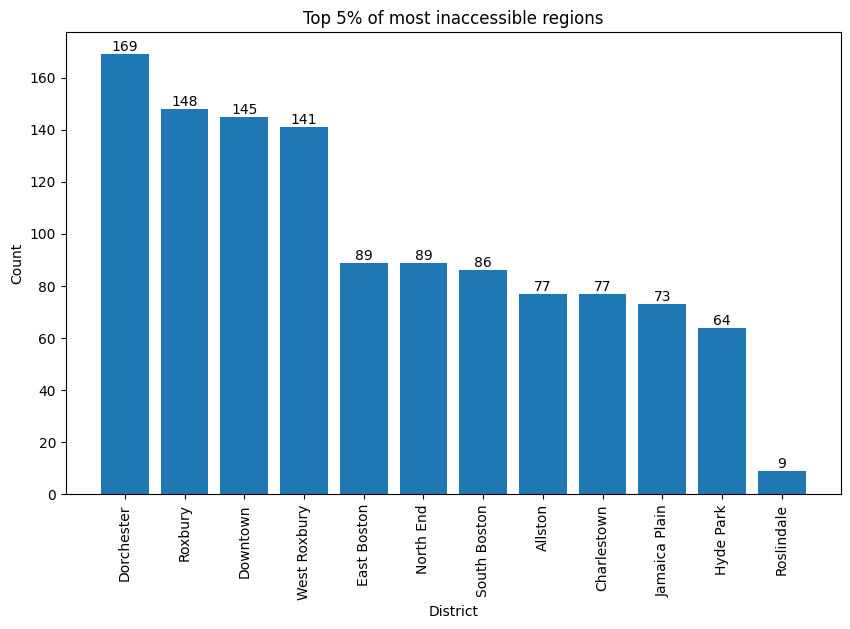

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt1=plt.bar(top_5_percent_inaccessible_score['District'],top_5_percent_inaccessible_score['Count'])
plt.bar_label(plt1)
plt.xlabel("District")
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title("Top 5% of most inaccessible regions")
plt.savefig("../graphs/inaccessibility/top_5_percent_inaccessible_score.pdf")